# 교차 검증과 그리드 서치


### 검증 세트

In [21]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [22]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [23]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [24]:
data.shape

(6497, 3)

In [25]:
6497 * 0.8

5197.6

In [26]:
print(train_input.shape)

(5197, 3)


In [27]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [28]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


# 교차 검증

In [30]:
# 교차검증에 cross_validate() 라는 함수가 있다.

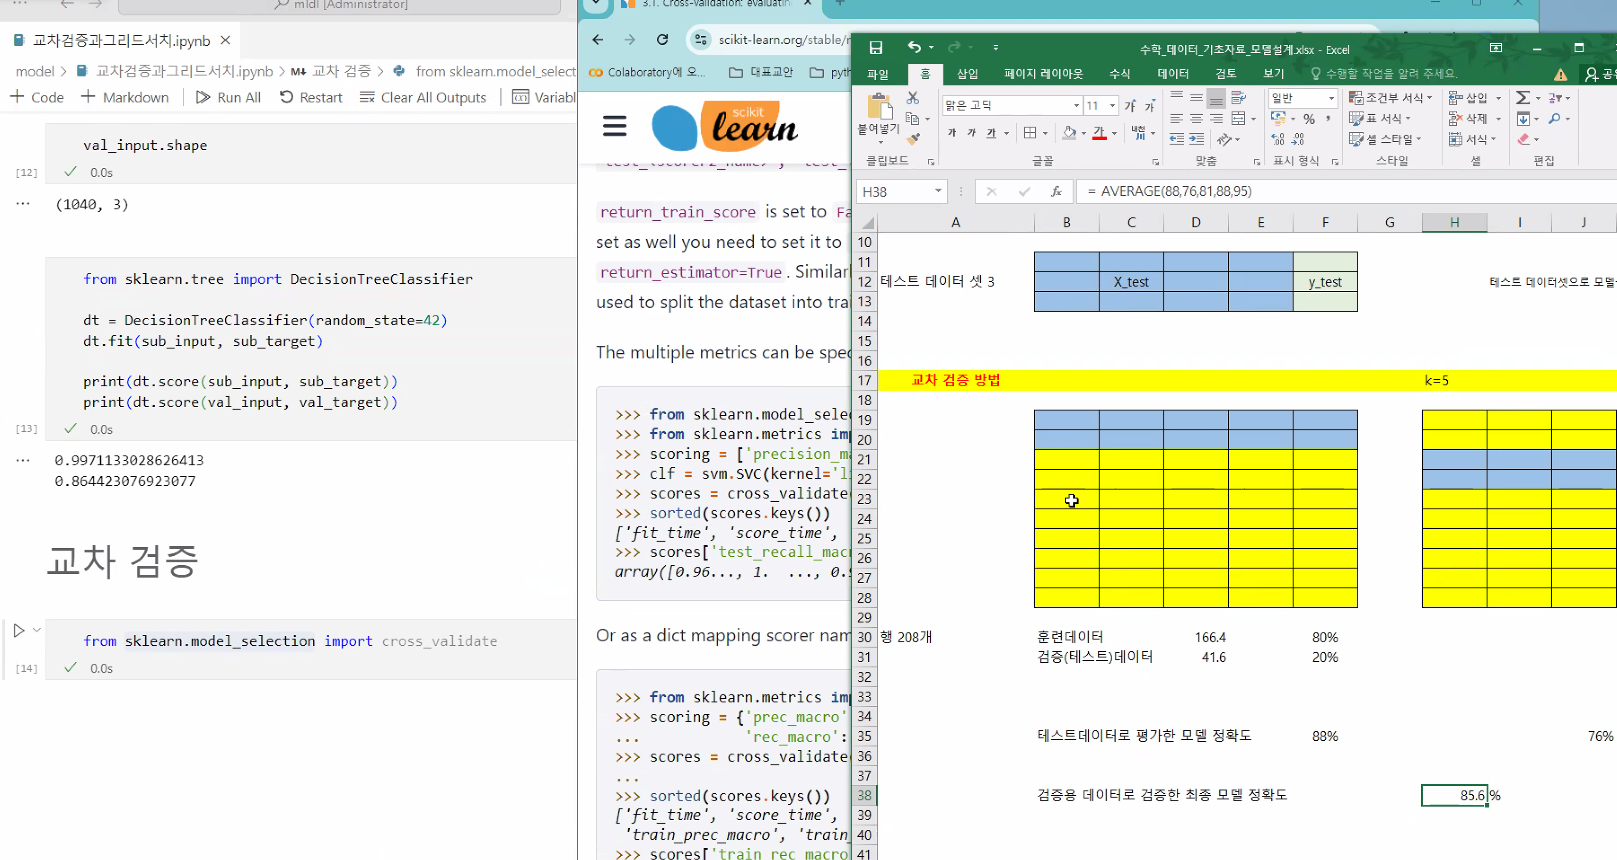

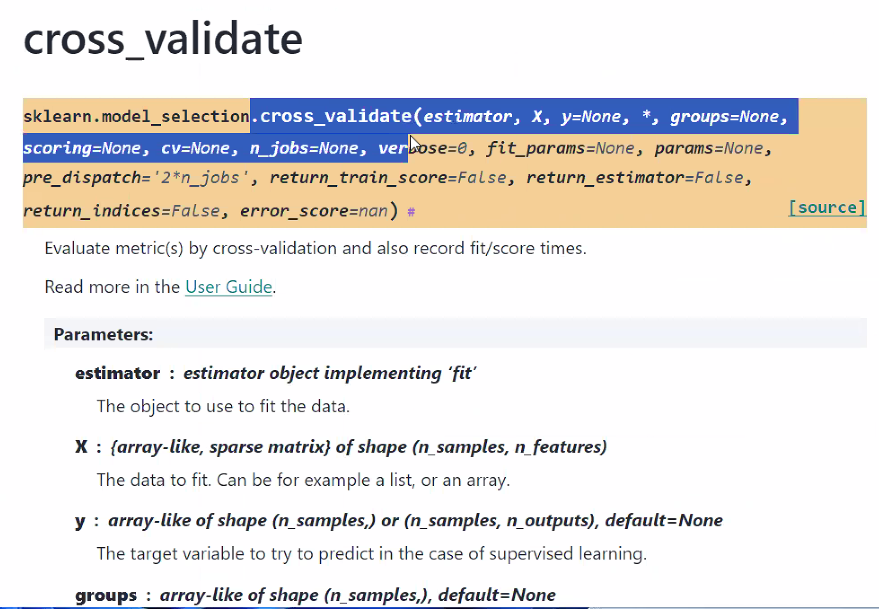

In [31]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, 
                        train_input, 
                        train_target
                        )
print(scores)

{'fit_time': array([0.00499058, 0.00399876, 0.00500941, 0.00502419, 0.00496888]), 'score_time': array([0.00099945, 0.0009954 , 0.00099683, 0.        , 0.00103259]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [32]:
import numpy as np

print(np.mean(scores['test_score']))

0.855300214703487


In [33]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [34]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


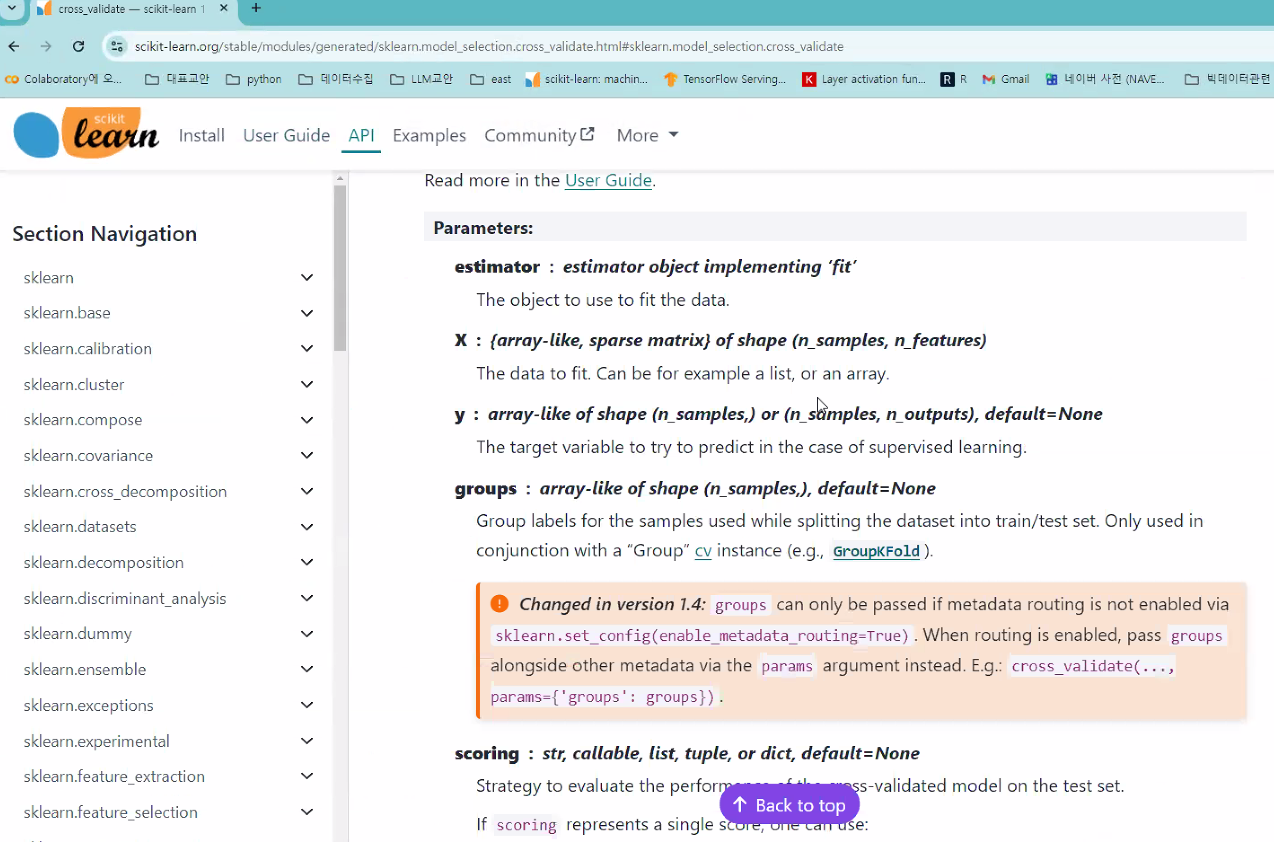

## 하이퍼파라미터 튜닝


In [35]:
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.0001, 
                                    0.0002, 
                                    0.0003, 
                                    0.0004, 
                                    0.0005]}

In [36]:
gs = GridSearchCV( DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [37]:
print(gs.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
gs.fit(train_input, train_target)

In [ ]:
gs.classes_

In [ ]:
print(gs.best_params_)

In [ ]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

In [ ]:
gs.fit(train_input, train_target)

In [ ]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

In [ ]:
print(gs.best_params_)

In [ ]:
print(gs.cv_results_['mean_test_score'])

In [ ]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

In [ ]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

In [38]:
import numpy as np

In [39]:
params2 = {
    'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
    'max_depth': range(5, 20, 1),
    'min_samples_split': range(2, 100, 10)
}

In [40]:
gs2 = GridSearchCV(DecisionTreeClassifier(random_state=42), params2, n_jobs=-1)
gs2.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
# 0.9615162593804117

In [42]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [43]:
from sklearn.model_selection import GridSearchCV

In [45]:
import numpy as np

# 랜덤 서치

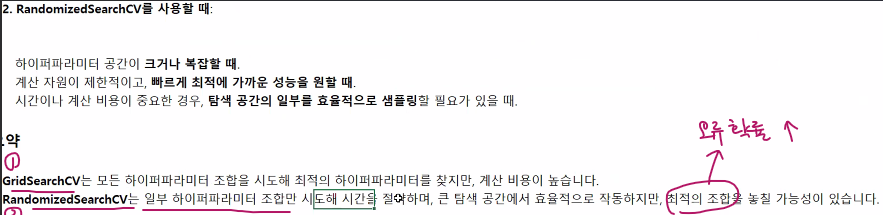

In [46]:
from scipy.stats import uniform, randint

In [47]:
rgen = randint(0, 10)
rgen.rvs(10)

array([1, 0, 0, 6, 9, 4, 6, 3, 5, 0])

In [48]:
np.unique(
    rgen.rvs(1000), 
    return_counts=True
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([115, 103,  89, 107,  97, 109, 100,  99,  79, 102]))

In [49]:
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.46570063, 0.56394542, 0.04311347, 0.79624366, 0.35077052,
       0.63292673, 0.00184026, 0.39472343, 0.59071808, 0.1472717 ])

In [50]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

gs = RandomizedSearchCV( DecisionTreeClassifier(
                                                splitter='random', 
                                                random_state=42
                                                ), 
                        params,
                        n_iter=100, 
                        n_jobs=-1, 
                        random_state=42)
gs.fit(train_input, train_target)

# 이유 1: "random" 옵션의 불안정성
# 이유 2: 과소적합 가능성
# 이유 3: 분할의 일관성 문제

# splitter='random' 옵션을 사용하면 성능이 저하될 가능성이 높은 이유는, 
# 모델이 데이터를 최적화된 방식으로 분할하지 않기 때문입니다. 
# splitter='best'는 각 노드에서 가능한 최적의 분할을 선택하므로, 
# 일반적으로 성능이 더 좋습니다. 
# 다만, splitter='random'은 매우 큰 데이터셋에서 학습 속도를 개선하려는 경우 유용할 수 있지만,
# 이 경우에도 성능 저하가 예상될 수 있습니다. 
# 따라서 대부분의 경우 splitter='best'를 사용하는 것이 더 좋은 성능을 보장합니다.

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AC8CC70350>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001AC8C140210>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AC8CE21290>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AC8CE21C90>},
                   random_state=42)

In [58]:
print( gs.best_params_ )

{'max_depth': 43, 'min_impurity_decrease': np.float64(0.00011407982271508446), 'min_samples_leaf': 19, 'min_samples_split': 18}


In [59]:
print( np.max( gs.cv_results_['mean_test_score'] ))

0.8458726956392981


In [60]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.786923076923077


# 확인문제

In [55]:
gs = RandomizedSearchCV( DecisionTreeClassifier( 
                                                splitter='random', 
                                                random_state=42), 
                        params,
                        n_iter=100, 
                        n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AC8CC70350>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001AC8C140210>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AC8CE21290>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AC8CE21C90>},
                   random_state=42)

In [56]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

dt = gs.best_estimator_
print(dt.score(test_input, test_target))

{'max_depth': 43, 'min_impurity_decrease': np.float64(0.00011407982271508446), 'min_samples_leaf': 19, 'min_samples_split': 18}
0.8458726956392981
0.786923076923077
